In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
titanic=pd.read_csv('titanic_train.csv')

In [61]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [62]:
titanic.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [63]:
titanic.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [64]:
titanic['Age'].fillna(value=titanic['Age'].mean(),inplace=True)

In [65]:
titanic['Embarked'].fillna(value='S',inplace=True)

In [66]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [67]:
titanic['Family']=titanic['SibSp']+titanic['Parch']
titanic.drop(columns=['SibSp','Parch'],inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [68]:
X=titanic.drop(columns=['Survived']).values
X

array([[3, 'male', 22.0, 7.25, 'S', 1],
       [1, 'female', 38.0, 71.2833, 'C', 1],
       [3, 'female', 26.0, 7.925, 'S', 0],
       ...,
       [3, 'female', 29.69911764705882, 23.45, 'S', 3],
       [1, 'male', 26.0, 30.0, 'C', 0],
       [3, 'male', 32.0, 7.75, 'Q', 0]], dtype=object)

In [69]:
y=titanic['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [70]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [71]:
X[:,-2]

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S

In [72]:
X[:,1]=encoder.fit_transform(X[:,1])
X[:,-2]=encoder.fit_transform(X[:,-2])

In [74]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[-2])

In [75]:
X=ohe.fit_transform(X).toarray()
X

array([[ 0.        ,  0.        ,  1.        , ..., 22.        ,
         7.25      ,  1.        ],
       [ 1.        ,  0.        ,  0.        , ..., 38.        ,
        71.2833    ,  1.        ],
       [ 0.        ,  0.        ,  1.        , ..., 26.        ,
         7.925     ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., 29.69911765,
        23.45      ,  3.        ],
       [ 1.        ,  0.        ,  0.        , ..., 26.        ,
        30.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ..., 32.        ,
         7.75      ,  0.        ]])

In [76]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [83]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [93]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
y_pred=classifier.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test,y_pred)

0.7988826815642458

0.776536312849162

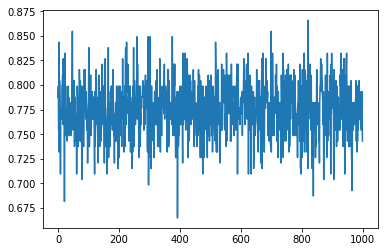

In [98]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

0.7757847533632287

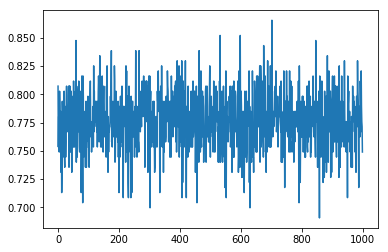

In [100]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

0.7761194029850746

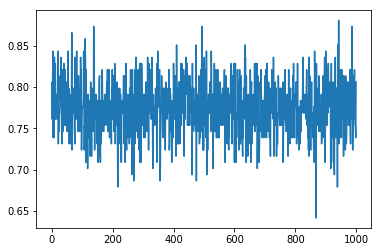

In [101]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

0.7761194029850746

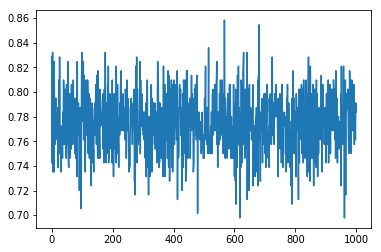

In [102]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)